**这是Algorithm 2的流程**

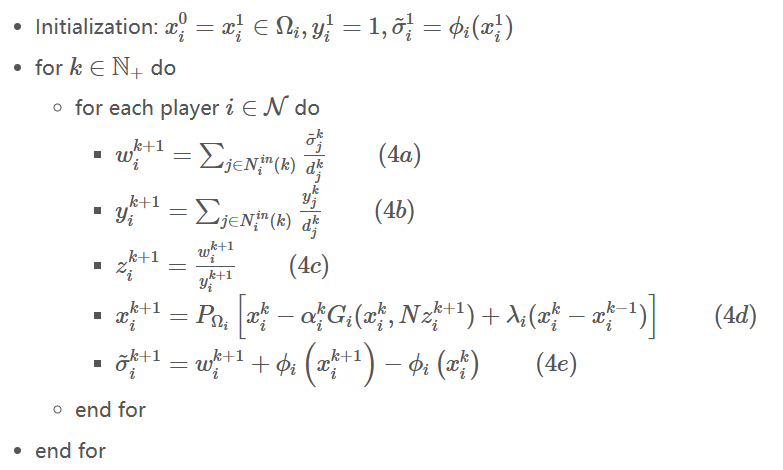

**这是数值模拟的相关信息**

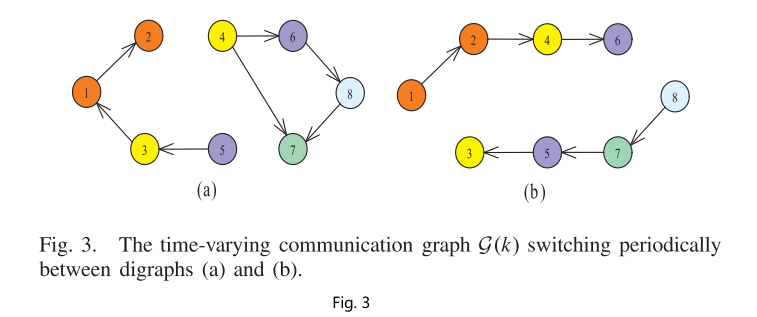

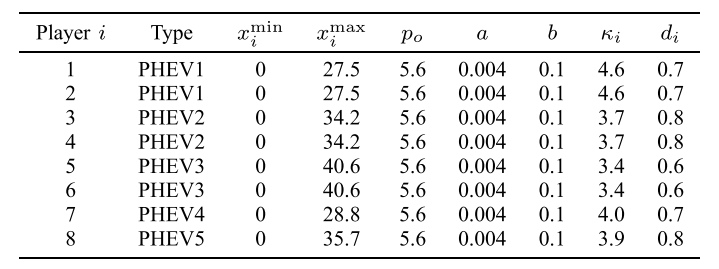

vec=0.0: 0.00
vec=0.2: 0.00
vec=0.4: 0.00
vec=0.6: 0.00
vec=0.8: 0.00


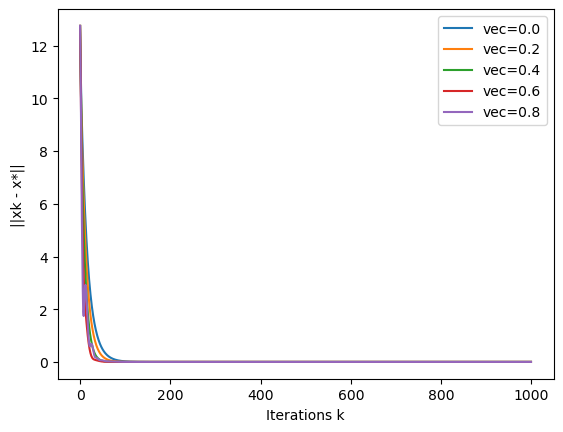


vec=0.0: 0.00
vec=0.2: 0.00
vec=0.4: 0.00
vec=0.6: 0.00
vec=0.8: 0.00


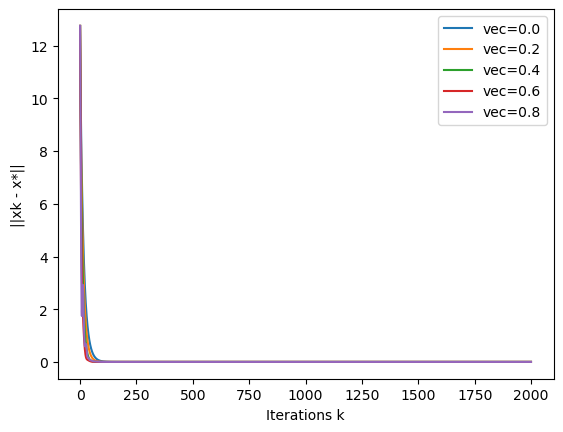


vec=0.0: 0.00
vec=0.2: 0.00
vec=0.4: 0.00
vec=0.6: 0.00
vec=0.8: 0.00


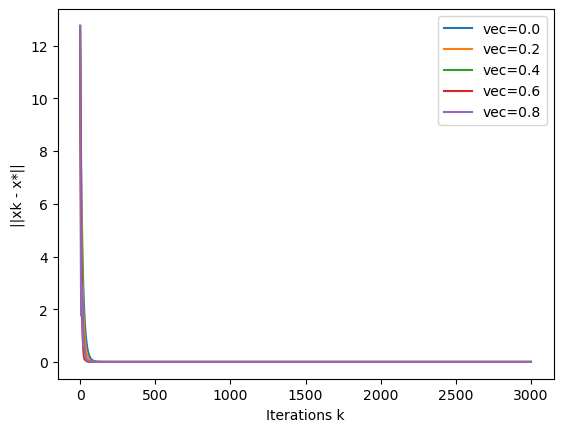


vec=0.0: 0.00
vec=0.2: 0.00
vec=0.4: 0.00
vec=0.6: 0.00
vec=0.8: 0.00


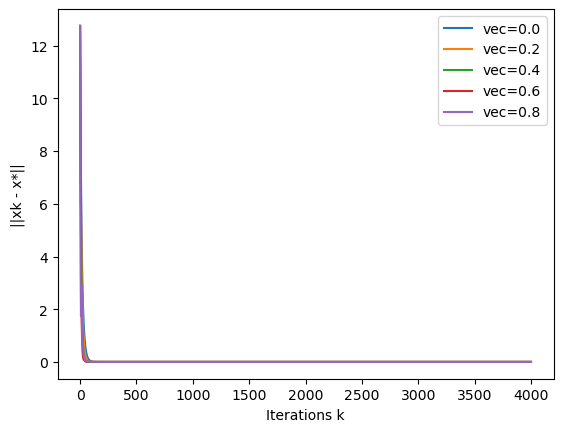


vec=0.0: 0.00
vec=0.2: 0.00
vec=0.4: 0.00
vec=0.6: 0.00
vec=0.8: 0.00


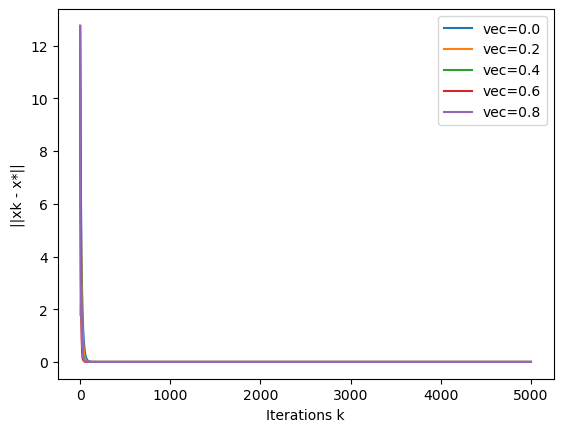

In [3]:
# Algorithm 2的数值仿真
import copy

n = 8
x_best = [-1, 17.68591179305579, 17.68591178894396, 15.568177079669734, 15.568176869116588,
            12.54841009221712, 12.548433755340588, 16.50869895275612, 16.348072510972873]
x_min = [-1, 0, 0, 0, 0, 0, 0, 0, 0]
x_max = [-1, 27.5, 27.5, 34.2, 34.2, 40.6, 40.6, 28.8, 35.7]
x = [-1, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(1, n + 1):
    x[i] = (x_min[i] + x_max[i]) / 2
p_0 = 5.6
a = 0.004
b = 0.1
k = [-1, 4.6, 4.6, 3.7, 3.7, 3.4, 3.4, 4.0, 3.9]
d = [-1, 0.7, 0.7, 0.8, 0.8, 0.6, 0.6, 0.7, 0.8]
alpha = 0.01
A_1 = [
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 1 / 2, 0, 1 / 2, 0, 0, 0, 0, 0],
    [-1, 1 / 2, 1, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 1 / 2, 0, 1 / 2, 0, 0, 0],
    [-1, 0, 0, 0, 1 / 3, 0, 0, 0, 0],
    [-1, 0, 0, 0, 0, 1 / 2, 0, 0, 0],
    [-1, 0, 0, 0, 1 / 3, 0, 1 / 2, 0, 0],
    [-1, 0, 0, 0, 1 / 3, 0, 0, 1, 1 / 2],
    [-1, 0, 0, 0, 0, 0, 1 / 2, 0, 1 / 2],
]
A_2 = [
    [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    [-1, 1 / 2, 0, 0, 0, 0, 0, 0, 0],
    [-1, 1 / 2, 1 / 2, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 1, 0, 1 / 2, 0, 0, 0],
    [-1, 0, 1 / 2, 0, 1 / 2, 0, 0, 0, 0],
    [-1, 0, 0, 0, 0, 1 / 2, 0, 1 / 2, 0],
    [-1, 0, 0, 0, 1 / 2, 0, 1, 0, 0],
    [-1, 0, 0, 0, 0, 0, 0, 1 / 2, 1 / 2],
    [-1, 0, 0, 0, 0, 0, 0, 0, 1 / 2],
]
A = copy.deepcopy(A_1)
sigma = [-1]
for i in range(1, n + 1):
    sigma.append(x[i])
w = [-1, 0, 0, 0, 0, 0, 0, 0, 0]
y = [-1, 1, 1, 1, 1, 1, 1, 1, 1]
z = [-1, 0, 0, 0, 0, 0, 0, 0, 0]

xx = copy.deepcopy(x)
xxx = copy.deepcopy(x)
ssigma = copy.deepcopy(sigma)
yy = copy.deepcopy(y)

def init():
    global x, alpha, sigma, w, y, z, xx, xxx, ssigma, yy
    x = [-1, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range(1, n + 1):
        x[i] = (x_min[i] + x_max[i]) / 2
    alpha = 2
    sigma = [-1]
    for i in range(1, n + 1):
        sigma.append(x[i])
    w = [-1, 0, 0, 0, 0, 0, 0, 0, 0]
    y = [-1, 1, 1, 1, 1, 1, 1, 1, 1]
    z = [-1, 0, 0, 0, 0, 0, 0, 0, 0]

    xx = copy.deepcopy(x)
    xxx = copy.deepcopy(x)
    ssigma = copy.deepcopy(sigma)
    yy = copy.deepcopy(y)

#----------------------------------------------------------------

def upd_w(i):
    sum = 0
    for j in range(1, n + 1):
        sum += A[i][j] * ssigma[j]
    w[i] = sum    

def upd_y(i):
    sum = 0
    for j in range(1, n + 1):
        sum += A[i][j] * yy[j]
    y[i] = sum

def upd_z(i):
    z[i] = w[i] / y[i]

def G(i, x, sigma):
    return a * (sigma + x) + b  - 2 * p_0 * k[i] / x_max[i] * (1 - x / x_max[i])

def upd_x(i, vec):
    x[i] = xx[i] - alpha * G(i, xx[i], n * z[i]) + vec * (xx[i] - xxx[i])
    if x[i] < x_min[i]: x[i] = x_min[i]
    if x[i] > x_max[i]: x[i] = x_max[i]

def upd_sigma(i):
    sigma[i] = w[i] + x[i] - xx[i]

def algorithm_2(iter_num, vec):
    global A, A_1, A_2, w, ssigma, y, yy, z, x, xx, alpha, xxx, sigma
    init()
    res = []
    sum_1 = 0
    sum_2 = 0
    q = []
    for j in range(1, iter_num + 1):
        # 计算差距
        sum = 0
        for i in range(1, n + 1):
            sum += (x[i] - x_best[i]) ** 2
        sum = sum ** (0.5)
        res.append(sum)
        # 计算qt的分子（这里的alpha注意步长设置为1/sqrt(j)）
        sum_1 += (1 / j ** 0.5) * sum * sum
        sum_2 += (1 / j ** 0.5)
        q.append(sum_1 / sum_2)
        # 选择矩阵
        if j % 2: A = copy.deepcopy(A_1)
        else: A = copy.deepcopy(A_2)
        # Algorithm 2
        for i in range(1, n + 1):
            upd_w(i)
            upd_y(i)
            upd_z(i)
            upd_x(i, vec)
            upd_sigma(i)
            # upd_y(i)
            # upd_w(i)
            # upd_z(i)
            # upd_sigma(i)
            # upd_x(i, vec)
        # 更新状态
        xxx = copy.deepcopy(xx)
        xx = copy.deepcopy(x)
        yy = copy.deepcopy(y)
        ssigma = copy.deepcopy(sigma)
        # alpha = 1 / (j + 1) ** 0.6 + 1 / (j + 1) ** 1.2
    return res, q

import matplotlib.pyplot as plt
%matplotlib inline
def plot_results(iter_num, vecs, vecs_name):
    x = []
    y = []
    for i in range(0, iter_num):
        x.append(i)
        y.append(i)
    for T in range(0, len(vecs)):
        y = algorithm_2(iter_num, vecs[T])[0]
        plt.plot(x, y, label=vecs_name[T])
        plt.xlabel('Iterations k')
        plt.ylabel('||xk - x*||')
        plt.legend()
        print(vecs_name[T], end=': ')
        print('%.2f'%y[iter_num - 1])
    plt.show()
    print()

vecs = [0.0, 0.2, 0.4, 0.6, 0.8]
vecs_name = ['vec=0.0', 'vec=0.2', 'vec=0.4', 'vec=0.6', 'vec=0.8']
plot_results(1000, vecs, vecs_name)
plot_results(2000, vecs, vecs_name)
plot_results(3000, vecs, vecs_name)
plot_results(4000, vecs, vecs_name)
plot_results(5000, vecs, vecs_name)

下面通过数值仿真来证明Algorithm 2的收敛速度等于$O(\frac{\ln{t}}{\sqrt{t}})$

即证：$\{q_t\}$收敛速率等于$\{c_t\}$，$c_t = \frac{\ln{t}}{\sqrt{t}}$

$$q_t=\frac{\sum\limits_{k=1}^t\alpha_k\|x_k-x^*\|^2}{\sum\limits_{k=1}^t\alpha_k}$$

0.7062728407372765
17.694241354622893


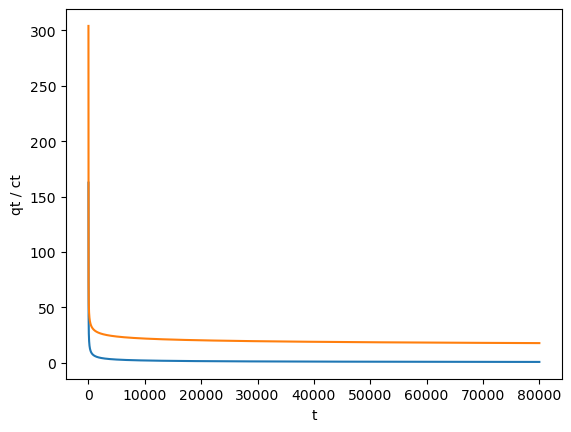

In [4]:
import math
def plot_results_convergence_2(iter_num):
    x = []
    y = []
    z = []
    for i in range(2, iter_num + 1 + 1): # 第一项ct是0，所以从第二项开始
        x.append(i)
    for i in range(1, iter_num + 1):
        z.append(math.log(i) / (i ** 0.5))
    y = algorithm_2(iter_num, 0.6)[1]

    # qt的图像
    print(y[iter_num - 1])
    plt.plot(x, y)
    '''
        经过调整参数为(x_min + x_max) / 2, 初始差距值已经比论文还低一些
        但是qt始终无法收敛到0, 这是为什么呢?

        当迭代次数很大时, 分子中的差距值已经很小, 所以导致分子比分母小许多, 所以假设论文中的迭代次数是8w次, 我比它多10倍,
        比它多那么多后, 即使我刚开始迭代时的分子很大, 分子也会被后面10倍迭代次数的分母追上来。
    '''
    
    # 这是用来画qt / ct的图像
    for i in range(1, iter_num):
        y[i] = y[i] / z[i]
    print(y[iter_num - 1])
    plt.plot(x[1:], y[1:])
    plt.xlabel('t')
    plt.ylabel('qt / ct')
    plt.show()

plot_results_convergence_2(80000)